In [29]:
from collections import defaultdict
from matplotlib import pyplot as plt
import numpy as np
import operator
import pandas as pd
import pickle
import random
import scipy
from sklearn.metrics.pairwise import linear_kernel
from sklearn.neighbors import NearestNeighbors


import src.knntools as knntools
import src.postprocess as postprocess
import src.preprocess as preprocess
import src.tfidftools as tfidftools
import src.tools as tools
import src.recencytools as recency
import src.scoring as scoring

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
path_to_data = 'data/'

training = pd.read_csv(path_to_data + 'training_set.csv', sep=',', header=0)

training_info = pd.read_csv(
    path_to_data + 'training_info.csv', sep=',', parse_dates=True, header=0)

test = pd.read_csv(path_to_data + 'test_set.csv', sep=',', header=0)

test_info = pd.read_csv(path_to_data + 'test_info.csv',
                        sep=',', parse_dates=True, header=0)
path_to_results = 'results/'

In [31]:
train_info, train_email_ids_per_sender, val_info, val_email_ids_per_sender = scoring.get_train_val(training, training_info, train_frac=0.95)

Processing training !
processed 0 senders
processed 20 senders
processed 40 senders
processed 60 senders
processed 80 senders
processed 100 senders
processed 120 senders
Processing val !
processed 0 senders
processed 20 senders
processed 40 senders
processed 60 senders
processed 80 senders
processed 100 senders
processed 120 senders


In [32]:
token_dict = preprocess.body_dict_from_panda(train_info)

Constructing dictionnary from dataframe...
20000 / 41432
0 / 41432
40000 / 41432
30000 / 41432
10000 / 41432
done !


In [33]:
# Compute tfidf variables
tfidf_model, tfidf_matrix, tfidf_mids = tfidftools.get_tfidf(token_dict, 0.001, 0.10)

In [36]:
nb_neighbors_list = [10, 100, 1000]


In [37]:
nb_recipients = 10
scores = []

for nb_neighbors in nb_neighbors_list:
    mid_recipient_scores = knntools.compute_similarity_scores(tfidf_model, tfidf_matrix,
                                  tfidf_mids, train_info, val_info, nb_similars=nb_neighbors)
    knn_predictions = knntools.similar_dic_to_standard(mid_recipient_scores, nb_recipients)
    current_score = scoring.compute_prediction_mad(knn_predictions, val_info)
    path_to_ranks = 'ranks_val/knn-k-{nb_neighbors}-rec-{nb_recip}'.format(nb_neighbors=nb_neighbors,
                                                                     nb_recip=nb_recipients)
    with open(path_to_ranks, 'wb') as infile:
              pickle.dump(knn_dic, infile)
    scores.append(current_score)
    print(scores)

AttributeError: 'module' object has no attribute 'xlable'

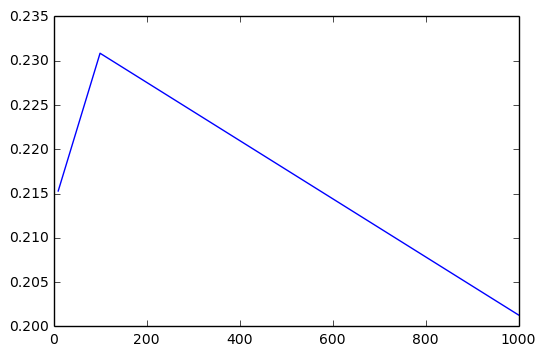

In [38]:
plt.plot(nb_neighbors_list, scores)
plt.xlable('number of nearest neighbours')
plt.ylabel('map score')
plt.show()